In [4]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz
from scipy.signal import argrelmin, argrelmax
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as met
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [5]:
data_path = 'Data_new/data/'

In [6]:
def read_file(data_path):
    file_number = 0
    file_to_work = list()
    for filename in os.listdir(data_path):
        if filename.endswith(".csv"):
            file_number += 1
            file_to_work.append(data_path + filename)
    return(file_to_work, file_number)

In [7]:
file_list, file_number = read_file(data_path)

In [8]:
print('All data sets:', file_number)

All data sets: 15


In [9]:
file_list

['Data_new/data/1.csv',
 'Data_new/data/10.csv',
 'Data_new/data/11.csv',
 'Data_new/data/12.csv',
 'Data_new/data/13.csv',
 'Data_new/data/14.csv',
 'Data_new/data/15.csv',
 'Data_new/data/2.csv',
 'Data_new/data/3.csv',
 'Data_new/data/4.csv',
 'Data_new/data/5.csv',
 'Data_new/data/6.csv',
 'Data_new/data/7.csv',
 'Data_new/data/8.csv',
 'Data_new/data/9.csv']

In [10]:
def get_data_from_file(file):
    columns_name = ['Seq_number', 'X', 'Y', 'Z', 'Mark']
    data = pd.read_csv(file)
    data.columns = columns_name
    return data

In [11]:
def check_data(data):
    nan_flag = False
    for c in data.columns:
        if any(data[c] == np.nan):
            print(c, 'contains NaNs')
            nan_flag = True
        if not nan_flag:
            print('No missing values in column', c)
    print('\n')
    pass

Data research

In [12]:
data = get_data_from_file('Data_new/data/10.csv')

In [13]:
def data_clean(data):
    return data[data.Mark != 0]

In [14]:
data = data_clean(data)

In [15]:
data.head()

,Seq_number,X,Y,Z,Mark
0,1.0,2077,2160,1703,1
1,2.0,2082,2168,1704,1
2,3.0,2083,2159,1703,1
3,4.0,2085,2162,1706,1
4,5.0,2086,2159,1705,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126799 entries, 0 to 126798
Data columns (total 5 columns):
Seq_number    126799 non-null float64
X             126799 non-null int64
Y             126799 non-null int64
Z             126799 non-null int64
Mark          126799 non-null int64
dtypes: float64(1), int64(4)
memory usage: 5.8 MB


In [17]:
#class distribution check
data['Mark'].value_counts()/float(len(data))

1    0.347392
3    0.186090
7    0.175325
4    0.174678
6    0.058747
5    0.030678
2    0.027090
Name: Mark, dtype: float64

Text(0.5,1,'Class distribution figure')

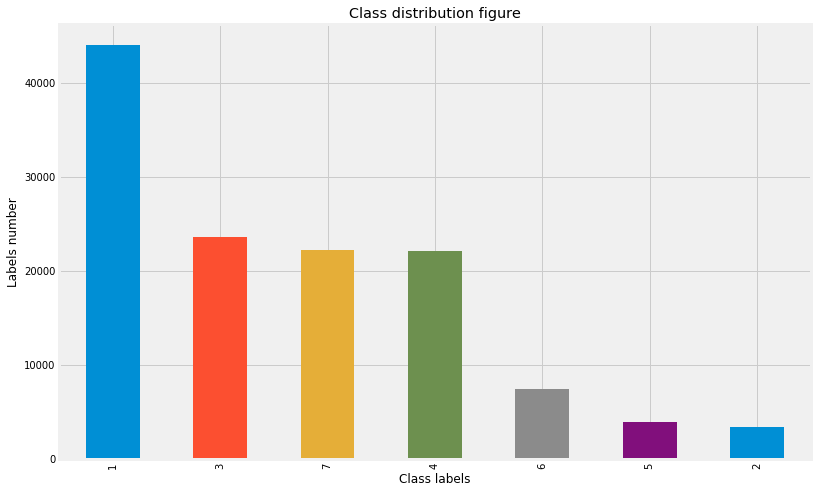

In [18]:
#plt.figure(0, figsize=(12, 8))
fig0 = data['Mark'].value_counts().plot(kind='bar', figsize=(12,8))
fig0.set_xlabel('Class labels')
fig0.set_ylabel('Labels number')
fig0.set_title('Class distribution figure')

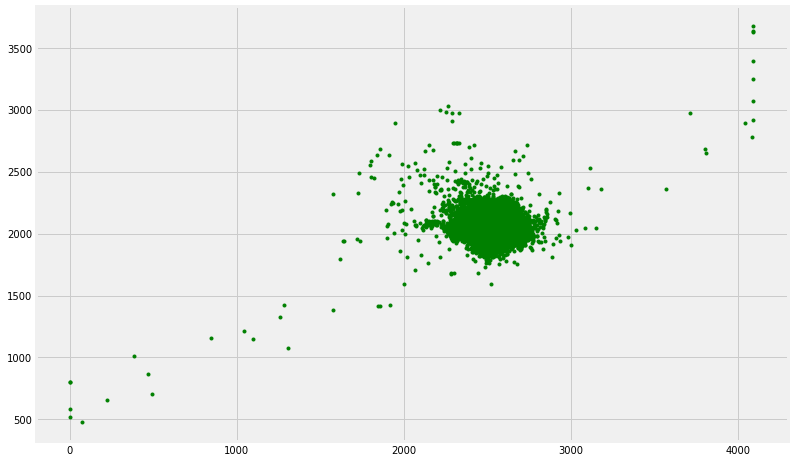

In [19]:
y = data['X']
x = data['Y']
plt.figure(figsize=(12,8))
plt.plot(x,y,'.', color='green')

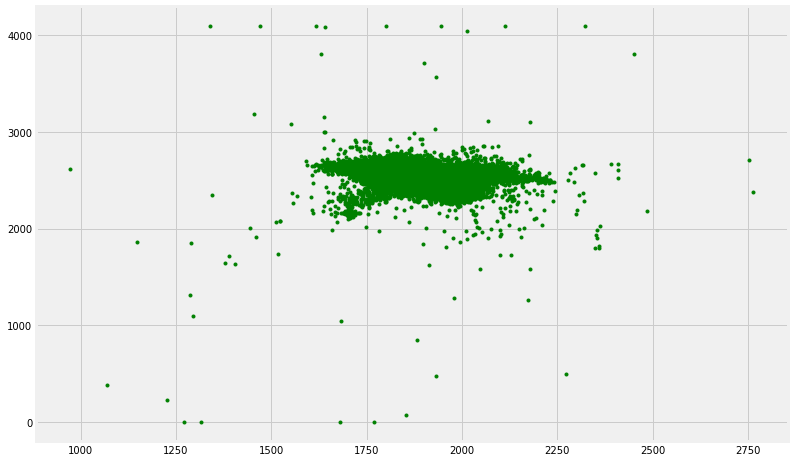

In [20]:
y = data['Y']
x = data['Z']
plt.figure(figsize=(12,8))
plt.plot(x,y,'.', color='green')

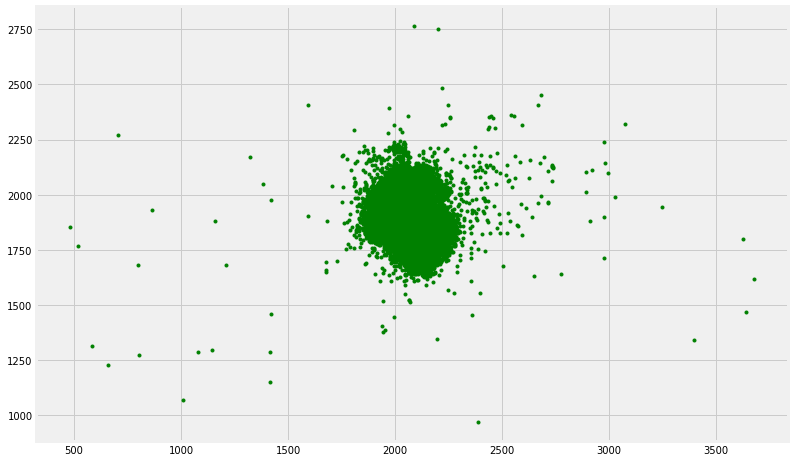

In [21]:
y = data['Z']
x = data['X']
plt.figure(figsize=(12,8))
plt.plot(x,y,'.', color='green')

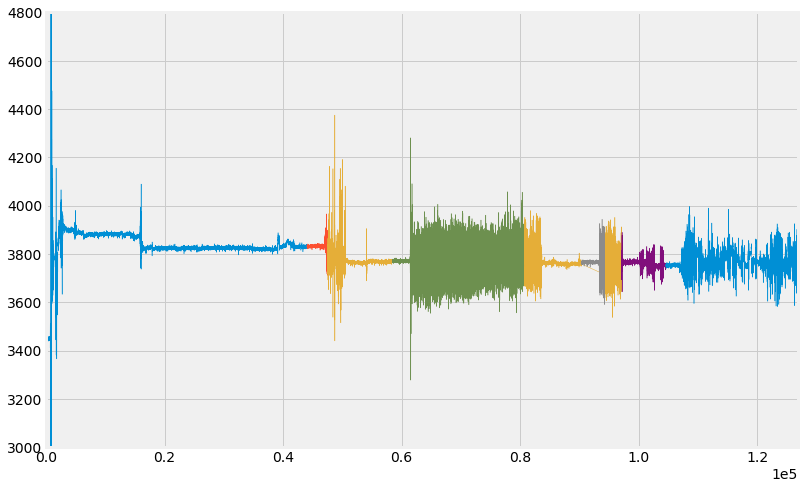

In [22]:
#add norms for each data point
data['Norm'] = np.sqrt(data['X']**2 + data['Y']**2 + data['Z']**2)

#Visualizing the series
plt.figure(1, figsize=(12, 8))
plt.style.use('fivethirtyeight')

for mark in range(1, 8):
    plt.plot(data[data['Mark'] == mark]['Norm'], linewidth=.5)
plt.xlim(0, len(data))
plt.ylim(3000, 4800)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

There are large differences between the different activities

Also there are differences between the different datasets, for example

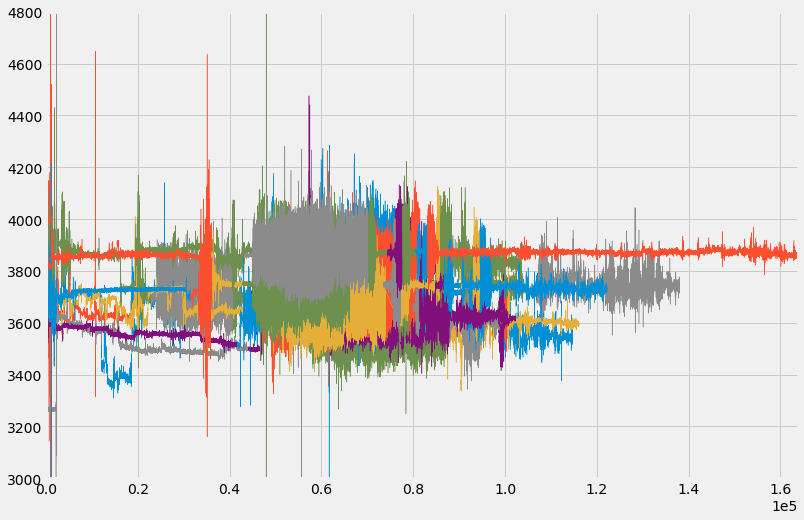

In [23]:
temp_file_list = [
    'Data_new/data/12.csv',
    'Data_new/data/13.csv',
    'Data_new/data/14.csv',
    'Data_new/data/15.csv',
    'Data_new/data/2.csv',
    'Data_new/data/3.csv',
    'Data_new/data/4.csv',
    'Data_new/data/9.csv']
plt.figure(1, figsize=(12, 8))
plt.style.use('fivethirtyeight')
for temp_file in temp_file_list:
    data = get_data_from_file(temp_file)
    data = data_clean(data)
    data['Norm'] = np.sqrt(data['X']**2 + data['Y']**2 + data['Z']**2)
    for mark in range(1, 8):
        plt.plot(data[data['Mark'] == mark]['Norm'], linewidth=.5)
    plt.xlim(0, len(data))
    plt.ylim(3000, 4800)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    
    

If you project a part of the 3D dataset on the plane, you get the following picture

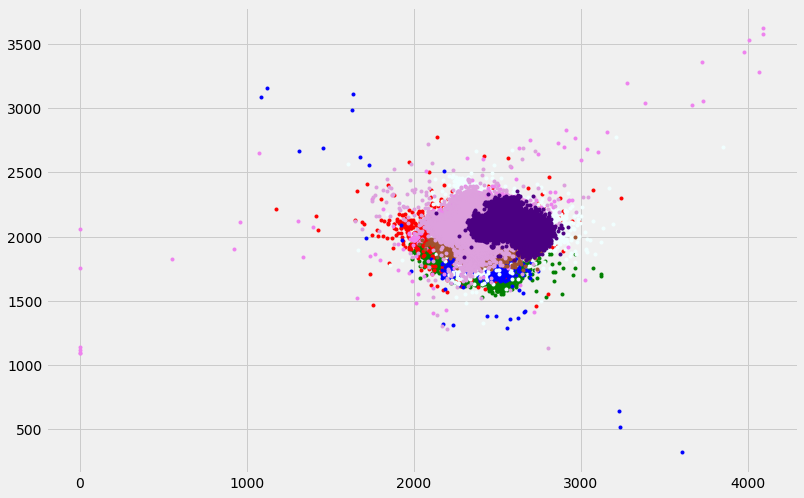

In [24]:
temp_file_list = [
    'Data_new/data/12.csv',
    'Data_new/data/13.csv',
    'Data_new/data/14.csv',
    'Data_new/data/15.csv',
    'Data_new/data/2.csv',
    'Data_new/data/3.csv',
    'Data_new/data/4.csv',
    'Data_new/data/9.csv']
color_list = ['green', 'red', 'blue', 'azure', 'violet', 'sienna', 'plum', 'indigo']
plt.figure(2, figsize=(12, 8))
plt.style.use('fivethirtyeight')
for temp_file in temp_file_list:
    data_viz = get_data_from_file(temp_file)
    data_viz = data_clean(data_viz)
    y = data_viz['X']
    x = data_viz['Y']
    plt.plot(x,y,'.', color=color_list[temp_file_list.index(temp_file)])

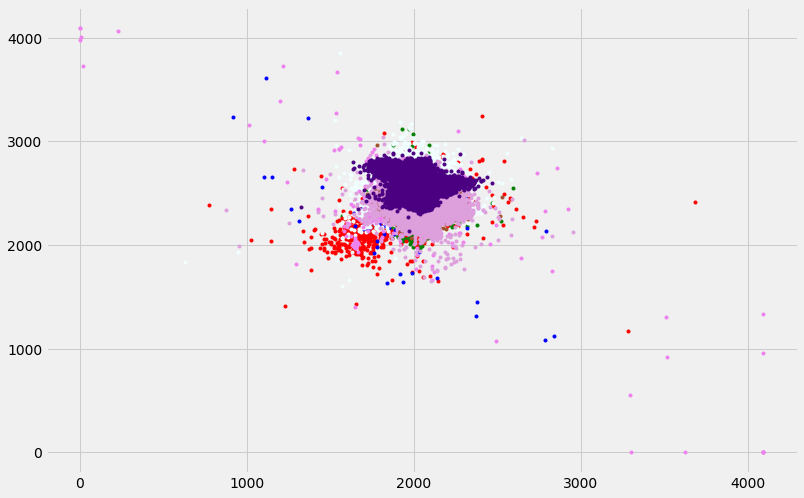

In [25]:
temp_file_list = [
    'Data_new/data/12.csv',
    'Data_new/data/13.csv',
    'Data_new/data/14.csv',
    'Data_new/data/15.csv',
    'Data_new/data/2.csv',
    'Data_new/data/3.csv',
    'Data_new/data/4.csv',
    'Data_new/data/9.csv']
color_list = ['green', 'red', 'blue', 'azure', 'violet', 'sienna', 'plum', 'indigo']
plt.figure(2, figsize=(12, 8))
plt.style.use('fivethirtyeight')
for temp_file in temp_file_list:
    data_viz = get_data_from_file(temp_file)
    data_viz = data_clean(data_viz)
    y = data_viz['Y']
    x = data_viz['Z']
    plt.plot(x,y,'.', color=color_list[temp_file_list.index(temp_file)])

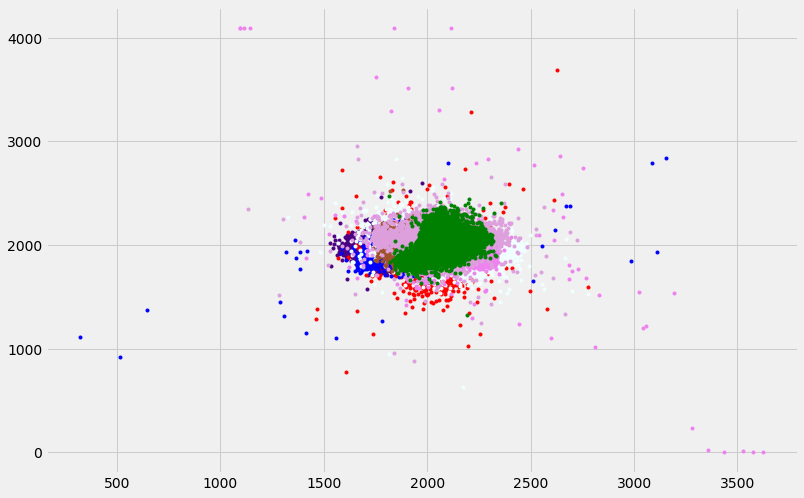

In [26]:
temp_file_list = [
    'Data_new/data/12.csv',
    'Data_new/data/13.csv',
    'Data_new/data/14.csv',
    'Data_new/data/15.csv',
    'Data_new/data/2.csv',
    'Data_new/data/3.csv',
    'Data_new/data/4.csv',
    'Data_new/data/9.csv']
color_list = ['indigo', 'red', 'blue', 'azure', 'violet', 'sienna', 'plum', 'green']
plt.figure(2, figsize=(12, 8))
plt.style.use('fivethirtyeight')
for temp_file in temp_file_list:
    data_viz = get_data_from_file(temp_file)
    data_viz = data_clean(data_viz)
    y = data_viz['Z']
    x = data_viz['X']
    plt.plot(x,y,'.', color=color_list[temp_file_list.index(temp_file)])

Text(0.5,0,'Frequency [Hz]')

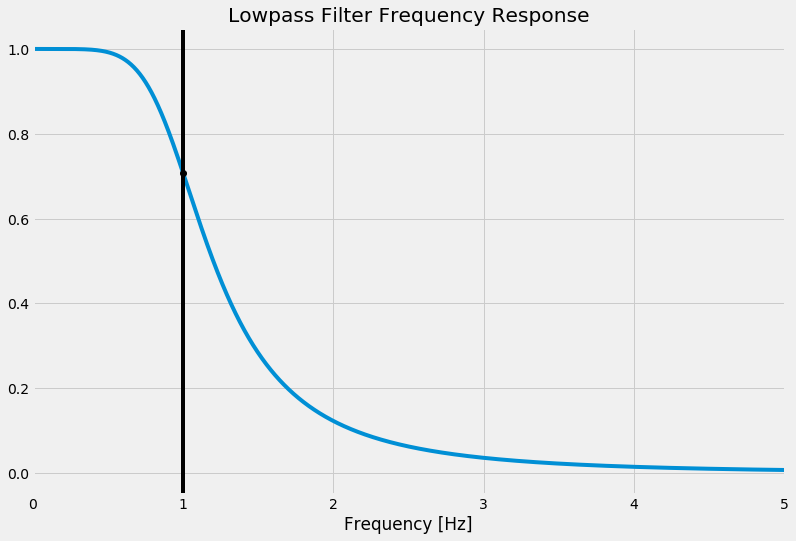

In [27]:
def butter_lowpass(cutoff, fs, order=1):
    # helper function to return coefficients for scipy.lfilter
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=1):
    # applies a lowpass filter
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=1):
    # helper function to return coefficients for scipy.lfilter
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    # applies a highpass filter
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 3
fs = 52.0       # sample rate, Hz
cutoff = 1     # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.figure(figsize=(12,8))
plt.plot(0.5*fs*w/np.pi, np.abs(h))
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 5)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')

(1000, 3000)

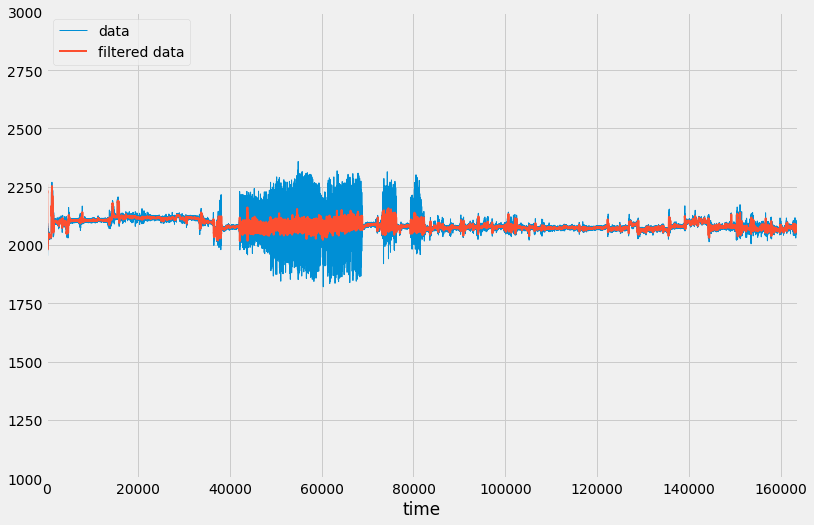

In [28]:
# test the filter on a sample 'X' of the dataset
filter_test_data = data['X']
filter_test_x = range(len(filter_test_data))
filter_test_y = butter_lowpass_filter(filter_test_data, cutoff, fs, order)
plt.figure(figsize=(12,8))
plt.plot(filter_test_x, filter_test_data, linewidth=1, label='data')
plt.plot(filter_test_x, filter_test_y, linewidth=2, label='filtered data')
plt.xlabel('time')
plt.legend(loc='upper left')
plt.xlim(0, len(filter_test_data))
plt.ylim(1000, 3000)

In [29]:
# apply the filters
for c in ['X', 'Y', 'Z', 'Norm']:
    data[c+'low'] = butter_lowpass_filter(data[c], cutoff, fs, order)
    data[c+'h'] = butter_highpass_filter(data[c], cutoff, fs, order)

In [30]:
data.head()

,Seq_number,X,Y,Z,Mark,Norm,Xlow,Xh,Ylow,Yh,Zlow,Zh,Normlow,Normh
0,1.0,2249,2677,2046,1,4050.980869,0.441070,1992.881208,0.525009,2372.140060,0.401258,1812.999089,0.794471,3589.650355
1,2.0,2270,2568,2005,1,3970.837317,2.985083,1530.177532,3.526886,1702.643957,2.703855,1338.800409,5.353705,2651.676599
2,3.0,2222,2565,2003,1,3940.624062,10.206218,1061.700891,11.981540,1221.659622,9.213486,962.394899,18.238478,1882.926952
3,4.0,2235,2571,2074,1,3988.325714,24.424494,714.004707,28.535543,812.924053,22.014447,700.863159,43.539212,1288.233244
4,5.0,2205,2559,2075,1,3964.357577,47.240941,376.615241,55.015339,445.999094,42.597760,408.294829,84.105603,710.596923


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163739 entries, 0 to 166738
Data columns (total 14 columns):
Seq_number    163739 non-null float64
X             163739 non-null int64
Y             163739 non-null int64
Z             163739 non-null int64
Mark          163739 non-null int64
Norm          163739 non-null float64
Xlow          163739 non-null float64
Xh            163739 non-null float64
Ylow          163739 non-null float64
Yh            163739 non-null float64
Zlow          163739 non-null float64
Zh            163739 non-null float64
Normlow       163739 non-null float64
Normh         163739 non-null float64
dtypes: float64(10), int64(4)
memory usage: 18.7 MB


In [32]:
def rms(series):
    # returns root mean square value of a series
    return np.sqrt((series**2).mean())

In [33]:
def min_max_mean(series):
    # returns the average of the differences between local mins/maxs
    mins = argrelmin(series)[0]    # indices of the local minima
    maxs = argrelmax(series)[0]    # local maxima
    min_max_sum = 0
    # build the sums, then take the average
    #print(len(mins), len(maxs))
    if len(mins) != 0 and len(maxs) != 0:
        if len(mins) <= len(maxs):
            for j, arg in enumerate(mins):
                min_max_sum += series[maxs[j]] - series[arg]
        else:
            for j, arg in enumerate(maxs):
                min_max_sum += series[arg] - series[mins[j]]
        return min_max_sum/float(min(len(mins), len(maxs)))
    elif len(mins) == 0 and len(maxs) == 0:
        if len(mins) <= len(maxs):
            for j, arg in enumerate(mins):
                min_max_sum += series[maxs[j]] - series[arg]
        else:
            for j, arg in enumerate(maxs):
                min_max_sum += series[arg] - series[mins[j]]    
        return min_max_sum/float(1)
    elif len(mins) == 0 and len(maxs) != 0:
        if len(mins) <= len(maxs):
            for j, arg in enumerate(mins):
                min_max_sum += series[maxs[j]] - series[arg]
        else:
            for j, arg in enumerate(maxs):
                min_max_sum += series[arg] - series[mins[j]]    
        return min_max_sum/float(min(len(mins) + 1, len(maxs)))
    elif len(mins) != 0 and len(maxs) == 0:
        if len(mins) <= len(maxs):
            for j, arg in enumerate(mins):
                min_max_sum += series[maxs[j]] - series[arg]
        else:
            for j, arg in enumerate(maxs):
                min_max_sum += series[arg] - series[mins[j]]    
        return min_max_sum/float(min(len(mins), len(maxs) + 1))    

In [34]:
def extract_features(data, window_len):
    num_windows = int(round(2 * len(data)/window_len))
    i = 0    # initialize index
    features = []
    
    for n in range(num_windows):
        # isolate window
        win = data.iloc[int(i): int(i) + window_len]
        
        for c in data.columns:
            # extract features for each series
            s = np.array(win[c])
            rms_val = rms(s)
            min_max = min_max_mean(s)
            mean = s.mean()
            std = s.std()
            new_features = [rms_val, min_max, mean, std]
            features.append(new_features)
        # update index
        i += window_len/2
    features = np.array(features)
    features.shape = num_windows, 48
    return features

In [35]:
features = data.drop(['Seq_number', 'Mark'], axis=1)

In [36]:
features.head()

,X,Y,Z,Norm,Xlow,Xh,Ylow,Yh,Zlow,Zh,Normlow,Normh
0,2249,2677,2046,4050.980869,0.441070,1992.881208,0.525009,2372.140060,0.401258,1812.999089,0.794471,3589.650355
1,2270,2568,2005,3970.837317,2.985083,1530.177532,3.526886,1702.643957,2.703855,1338.800409,5.353705,2651.676599
2,2222,2565,2003,3940.624062,10.206218,1061.700891,11.981540,1221.659622,9.213486,962.394899,18.238478,1882.926952
3,2235,2571,2074,3988.325714,24.424494,714.004707,28.535543,812.924053,22.014447,700.863159,43.539212,1288.233244
4,2205,2559,2075,3964.357577,47.240941,376.615241,55.015339,445.999094,42.597760,408.294829,84.105603,710.596923


In [37]:
X = extract_features(features, 26)

In [38]:
y = np.ones((len(X),), dtype=int)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [40]:
outliers_fraction = 0.15

In [41]:
def algorithm_selecting(X, y):
    clf1 = EllipticEnvelope(contamination=outliers_fraction)
    clf2 = svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.00001)
    clf3 = IsolationForest(contamination=outliers_fraction, random_state=42, n_estimators=100)
    for clf, label in zip([clf1, clf2, clf3],
                          ['Robust covariance',
                           'One-Class SVM',
                           'Isolation Forest']):
        scores = cross_val_score(clf, X, y, cv=5, n_jobs=-1, scoring='f1')
        scores_0 = cross_val_score(clf, X, y, cv=5, n_jobs=-1, scoring='accuracy')
        print('F1 scoring: %0.3f (+/- %0.3f) [%s]' % (scores.mean(), scores.std(), label))
        print('Accuracy scoring: %0.3f (+/- %0.3f) [%s]' % (scores_0.mean(), scores_0.std(), label))
        print('\n')
    pass

In [42]:
algorithm_selecting(X_train, y_train)

F1 scoring: 0.919 (+/- 0.007) [Robust covariance]
Accuracy scoring: 0.851 (+/- 0.012) [Robust covariance]


F1 scoring: 0.919 (+/- 0.007) [One-Class SVM]
Accuracy scoring: 0.849 (+/- 0.011) [One-Class SVM]


F1 scoring: 0.919 (+/- 0.005) [Isolation Forest]
Accuracy scoring: 0.849 (+/- 0.009) [Isolation Forest]




In [43]:
# helper function to quickly build different models
def model_build(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

In [44]:
# helper function to handle evaluation
def model_eval(model, X_test, y_test):
    pred = model.predict(X_test)
    print('F1 scoring: %0.5f' % (met.f1_score(y_test, pred)))
    print('Accuracy scoring: %0.5f' % (met.accuracy_score(y_test, pred)))
    print('\n')
    pass

In [45]:
# check model on test data
forest = model_build(IsolationForest(contamination=outliers_fraction, random_state=42, n_estimators=100), X_train, y_train)
model_eval(forest, X_test, y_test)

F1 scoring: 0.91245
Accuracy scoring: 0.83900




In [46]:
# train model on full dataset
forest_full = model_build(IsolationForest(contamination=outliers_fraction, random_state=42, n_estimators=100), X, y)

In [ ]:
file_list_val = [
    'Data_new/data/1.csv',
 'Data_new/data/11.csv',
 'Data_new/data/12.csv',
 'Data_new/data/13.csv',
 'Data_new/data/14.csv',
 'Data_new/data/15.csv',
 'Data_new/data/2.csv',
 'Data_new/data/3.csv',
 'Data_new/data/4.csv',
 'Data_new/data/5.csv',
 'Data_new/data/6.csv',
 'Data_new/data/7.csv',
 'Data_new/data/8.csv',
 'Data_new/data/9.csv']

In [ ]:
for file in file_list_val:
    data = get_data_from_file(temp_file)
    data = data_clean(data)
    data['Norm'] = np.sqrt(data['X']**2 + data['Y']**2 + data['Z']**2)
    for c in ['X', 'Y', 'Z', 'Norm']:
        data[c+'low'] = butter_lowpass_filter(data[c], cutoff, fs, order)
        data[c+'h'] = butter_highpass_filter(data[c], cutoff, fs, order)
    features = data.drop(['Seq_number', 'Mark'], axis=1)
    X_m = extract_features(features, 26)
    y_m = np.empty(((len(X),)))
    y_m.fill(1)
    print(file.split('/')[2])
    model_eval(forest_full, X_m, y_m)
    

1.csv
F1 scoring: 0.91888
Accuracy scoring: 0.84994


11.csv
F1 scoring: 0.91888
Accuracy scoring: 0.84994


12.csv
F1 scoring: 0.91888
Accuracy scoring: 0.84994


13.csv
F1 scoring: 0.91888
Accuracy scoring: 0.84994


14.csv
F1 scoring: 0.91888
Accuracy scoring: 0.84994


15.csv
F1 scoring: 0.91888
Accuracy scoring: 0.84994


2.csv
F1 scoring: 0.91888
Accuracy scoring: 0.84994


3.csv
F1 scoring: 0.91888
Accuracy scoring: 0.84994


4.csv
F1 scoring: 0.91888
Accuracy scoring: 0.84994


5.csv
F1 scoring: 0.91888
Accuracy scoring: 0.84994


6.csv
F1 scoring: 0.91888
Accuracy scoring: 0.84994


7.csv
F1 scoring: 0.91888
Accuracy scoring: 0.84994


8.csv
F1 scoring: 0.91888
Accuracy scoring: 0.84994




Reference Papers

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4029702/

https://www.researchgate.net/figure/In-the-dynamic-windowing-strategy-the-feature-extraction-uses-a-sliding-window-of-width_fig2_279137283

https://dsp.stackexchange.com/questions/36513/applying-a-window-function-to-a-speech-signal

https://pdfs.semanticscholar.org/8c18/b86e75f068b59a5ac9c334c1bc59fff5d328.pdf

https://cs.uwaterloo.ca/~s255khan/files/KER_sskmm_final.pdf

http://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html

http://scikit-learn.org/stable/modules/outlier_detection.html

https://www.researchgate.net/publication/221258784_Human_Activity_Recognition_from_Accelerometer_Data_Using_at_Wearable_Device?ev=prf_pub

https://www.researchgate.net/publication/227192676_Personalization_and_user_verification_in_wearable_systems_using_biometric_walking_patterns?ev=prf_pub